# Defocus Sampling
This tutorial covers how one can can create samples that mimic the data distribution from the experimental data.
For this extraction, we use the readable STAR format files.

If you were using:
- cryoSPARC: You can use **[PYEM](https://github.com/asarnow/pyem)** package to convert cryoSPARC
files to relion, using the 'csparc2star.py' command, specially using inverse mode. You can convert the reconstruction
jobs, such as refinement or even ab-initio, or you can simply convert the particle stack from the extraction jobs.
This tutorial provides a dummy example file containing ~10k particles, but for using your own dataset, please refer to
**[pyem tutorial](https://github.com/asarnow/pyem/wiki/Export-from-cryoSPARC-v2-and-later)**
for instructions, as this step assumes user already have this file in hands.
- RELION: You already have everything you need (particles.star containing defocus).

## Load Libraries

In [1]:
import sys
import matplotlib.pyplot as plt
from pathlib import Path
sys.path.append(str(Path.cwd()) + "/../src")

import EMCrafter
from EMCrafter.sampler import DefocusSampler
EMCrafter.base._set_logging(minimal=True)

## Create Sampler

DefocusSampler initialized
rlnParticles initialized


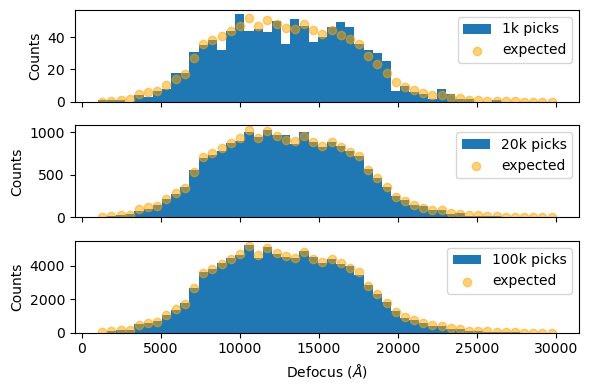

In [2]:
# Initialize sampler
dsampler = DefocusSampler(verbose=2)

# Read defocus from a STAR file
def_array = dsampler.read_defocus("data/exp_particles/particles_defocus.star")

# Build the sampler: this will create the sampling algorithm
# that can be used for sampling defocus values following the data
# distribution. The validate option shows overall pick versus expected
# distribution, which may help to determine the best number of bins (n_bins)
dsampler.build_sampler(
    def_array,            # Defocus array
    n_bins=50,            # Number of bins
    validate=True)        # Plot sampling

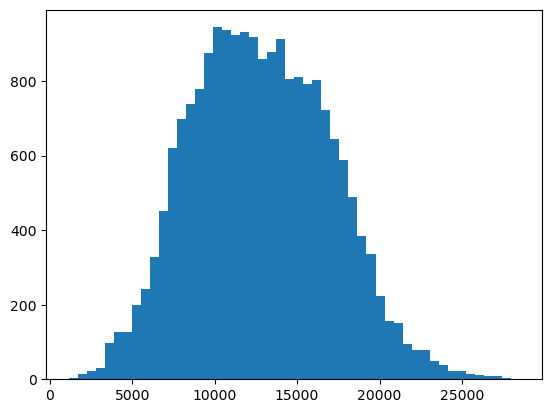

In [3]:
# After the sampler is built, you can generate random samples using:
samples = dsampler.sample(n=20000)

# Samples can be inspected with a histogram
_ = plt.hist(samples, bins=50)

## Storing/Loading class

In [4]:
# We can save this sampler for multiple use afterwards. As in the orientation sampler,
# this saves not only the sampler but also the sampled defocus (if sampled)

# Save
dsampler.save("data/pickle/defocus_sampler.pkl")

# Load
dsampler = DefocusSampler().load("data/pickle/defocus_sampler.pkl", validate=False)

Saving DefocusSampler object  to  data/pickle/defocus_sampler.pkl
Loaded DefocusSampler object from data/pickle/defocus_sampler.pkl
